In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 7.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219233 sha256=de23af6676649a19d9d4b7f02d52d5bbb3aa96d9740d33f3a76a3506c7892c3e
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(2)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MK, KD, DK, KQ, QK, KK, KK, KK, KE, ER, RT, T..."
1,"[MS, SW, WS, SG, GL, LL, LH, HG, GL, LN, NT, T..."
2,"[MS, SL, LF, FD, DL, LF, FR, RG, GF, FF, FG, G..."
3,"[MA, AV, VA, AP, PR, RL, LF, FG, GG, GL, LC, C..."
4,"[MS, ST, TI, IQ, QS, SE, ET, TD, DC, CY, YD, D..."
...,...
6265,"[MS, SY, YF, FG, GE, EH, HF, FW, WG, GE, EK, K..."
6266,"[MT, TV, VG, GK, KS, SS, SK, KM, ML, LQ, QH, H..."
6267,"[MN, NN, NL, LS, SF, FS, SE, EL, LC, CC, CL, L..."
6268,"[MA, AP, PE, EI, IN, NL, LP, PG, GP, PM, MS, S..."


Median length of Joined sequence is 879


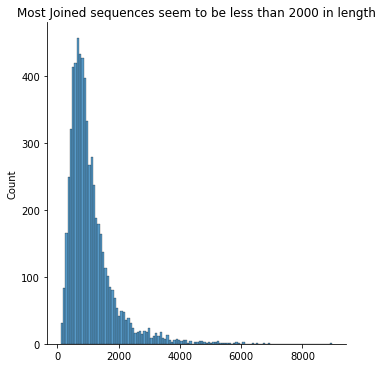

In [6]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8964
min sequence_data length: 105
median sequence_data length: 879


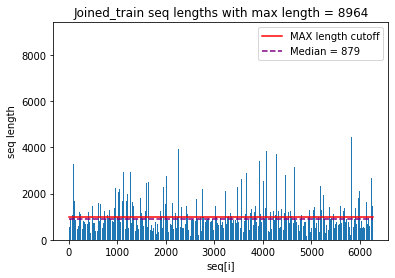

max word index: 400
Found 400 unique tokens.
pre padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6124
min sequences_test length: 132
median sequences_test length: 899


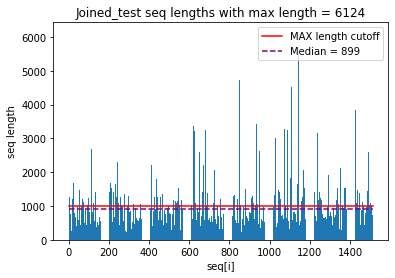

pre padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 401


In [3]:
data_2D_join_pre,data_test_2D_join_pre,num_words_2D_join,MAX_SEQUENCE_LENGTH_2D,MAX_VOCAB_SIZE_2D = f.get_seq_data_join(1000,1000,df_train,df_test, pad='pre', show = True)

In [4]:
data_2D_join_center,data_test_2D_join_center,num_words_2D_join,MAX_SEQUENCE_LENGTH_2D,MAX_VOCAB_SIZE_2D = f.get_seq_data_join(1000,1000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8964
min sequence_data length: 105
median sequence_data length: 879
max word index: 400
Found 400 unique tokens.
Center padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6124
min sequences_test length: 132
median sequences_test length: 899
Center padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 401


In [5]:
data_2D_join_post,data_test_2D_join_post,num_words_2D_join,MAX_SEQUENCE_LENGTH_2D,MAX_VOCAB_SIZE_2D = f.get_seq_data_join(1000,1000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 1000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 8964
min sequence_data length: 105
median sequence_data length: 879
max word index: 400
Found 400 unique tokens.
post padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 6124
min sequences_test length: 132
median sequences_test length: 899
post padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 401


In [ ]:

EMBEDDING_DIM_2D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 50
M_2D=10


x1 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_2D, EMBEDDING_DIM_2D, num_words_2D_join, M_2D)
x2 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_2D, EMBEDDING_DIM_2D, num_words_2D_join, M_2D)
x3 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_2D, EMBEDDING_DIM_2D, num_words_2D_join, M_2D)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model2D_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model2D_join.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)

trains = [data_2D_join_pre,data_2D_join_center,data_2D_join_post]
tests = [data_test_2D_join_pre,data_test_2D_join_center,data_test_2D_join_post]


jk = model2D_join.fit(trains,df_train['label'].values, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(tests,df_test['label'].values))
#plot_model(model2D_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
print(roc_auc_score(df_test['label'].values, model2D_join.predict(tests)))

Epoch 1/50
49/49 [==============================] - 37s 278ms/step - loss: 0.6707 - accuracy: 0.5972 - val_loss: 0.6802 - val_accuracy: 0.5013
Epoch 2/50
49/49 [==============================] - 11s 224ms/step - loss: 0.6605 - accuracy: 0.6254 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/50
49/49 [==============================] - 11s 225ms/step - loss: 0.6528 - accuracy: 0.6338 - val_loss: 0.6756 - val_accuracy: 0.5112
Epoch 4/50
49/49 [==============================] - 11s 226ms/step - loss: 0.6558 - accuracy: 0.6295 - val_loss: 0.7235 - val_accuracy: 0.5000
Epoch 5/50
49/49 [==============================] - 11s 227ms/step - loss: 0.6510 - accuracy: 0.6339 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 6/50
49/49 [==============================] - 11s 227ms/step - loss: 0.6472 - accuracy: 0.6406 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 7/50
49/49 [==============================] - 11s 227ms/step - loss: 0.6511 - accuracy: 0.6397 - val_loss: 0.7036 - val_accuracy: 0.5000

In [ ]:
#model2D_join.save('/content/drive/MyDrive/ML_Data/model2D_join.h5')